In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
af = pd.read_hdf('results/alif_exp_res_09_30_56.h5')
cf = pd.read_hdf('results/class_exp_res_03_51_11.h5')

In [5]:
af["alif"] = True
cf["alif"] = False

In [11]:
nf = pd.concat((af, cf))
nf.columns

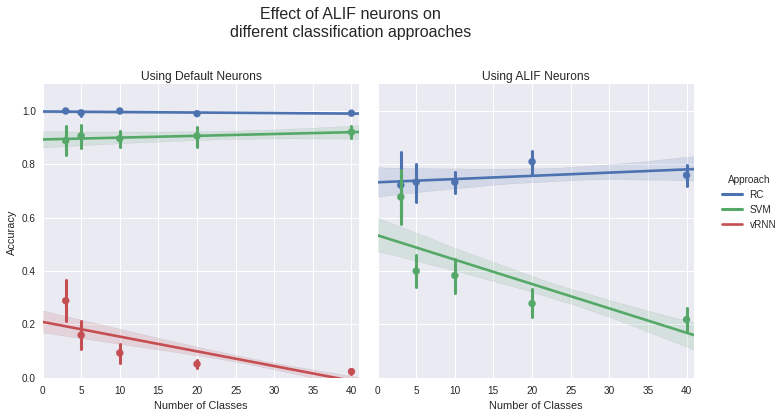

In [12]:
ff = sns.lmplot(x="n_classes", y="accuracy", hue="approach", col="alif", data=nf, x_estimator=np.mean, legend=False)

ax1 = ff.axes[0, 0]
ax2 = ff.axes[0, 1]
ax1.set_ylim((0.0, 1.1))
ax2.set_ylim((0.0, 1.1))
ax1.set_xlim((0, 41))
ax2.set_xlim((0, 41))

ax1.set_title("Using Default Neurons")
ax2.set_title("Using ALIF Neurons")

ll = len(ax1.lines)

ff.fig.legend((ax1.lines[0], ax1.lines[ll/2], ax1.lines[-1]), ("RC", "SVM", "vRNN"), title="Approach", bbox_to_anchor=(1.09, 0.7))

ff.set_axis_labels(x_var="Number of Classes", y_var="Accuracy")
ff.fig.suptitle("Effect of ALIF neurons on\ndifferent classification approaches", fontsize=16, y=1.15)
ff.fig.savefig("alif_n_class.pdf", format="pdf", bbox_inches='tight')